In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tableone import TableOne

In [2]:
# Read in the data
df = pd.read_csv("Verses.csv")
counts_df = pd.read_csv("VerseCounts.csv")

# Add two columns with individual book and standard work verse counts
df['Book_Verse_Count'] = df['Book'].map(counts_df.groupby(by='Book')['Verse_Count'].sum().to_dict())
df['Standard_Work_Verse_Count'] = df['Standard_Work'].map(counts_df.groupby(by='Standard_Work')['Verse_Count'].sum().to_dict())

# Inspect the data
df.head(15)

,Standard_Work,Book,Chapter,Verse,Citations,Text,Chapter_Verse_Count,Book_Verse_Count,Standard_Work_Verse_Count
0,Book of Mormon,2 Nephi,31,20,68,"Wherefore, ye must press forward with a steadf...",21,779,6604
1,Book of Mormon,Alma,7,12,64,"And he will take upon him death, that he may l...",27,1975,6604
2,Book of Mormon,Alma,7,11,61,"And he shall go forth, suffering pains and aff...",27,1975,6604
3,Pearl of Great Price,Moses,1,39,59,"For behold, this is my work and my glory—to br...",42,356,635
4,New Testament,Matthew,11,28,52,"Come unto me, all ye that labour and are heavy...",30,1071,7957
5,Doctrine and Covenants,Doctrine and Covenants,20,77,52,"O God, the Eternal Father, we ask thee in the ...",84,3654,3654
6,Book of Mormon,Mosiah,18,9,50,"Yea, and are willing to mourn with those that ...",35,785,6604
7,Book of Mormon,Mosiah,2,41,47,"And moreover, I would desire that ye should co...",41,785,6604
8,New Testament,John,3,16,47,"For God so loved the world, that he gave his o...",36,879,7957
9,Book of Mormon,Moroni,10,32,47,"Yea, come unto Christ, and be perfected in him...",34,163,6604


In [3]:
# 1. "Table 1" with standard works and citation COUNTS

# Generate the table for COUNTS
table_df = TableOne(df, columns=['Standard_Work', 'Citations'],
                    categorical=['Standard_Work'], continuous=['Citations'], missing = False).tableone

# Drop the last row and rename the index and a column
table_df = table_df.iloc[:-1, ]
table_df.columns = ['Citations']
table_df.index = pd.MultiIndex.from_tuples([(                   'n',                       ''),
                                            ('Standard Work: n (%)',         'Book of Mormon'),
                                            ('Standard Work: n (%)', 'Doctrine and Covenants'),
                                            ('Standard Work: n (%)',          'New Testament'),
                                            ('Standard Work: n (%)',          'Old Testament'),
                                            ('Standard Work: n (%)',   'Pearl of Great Price')])

# Calculate the PROPORTIONS (i.e. average citations per verse)
df_1 = df.merge(counts_df, on=["Standard_Work", "Book", "Chapter"])
cite_dict = df_1.groupby('Standard_Work')['Citations'].sum().to_dict()
count_dict = counts_df.groupby(by='Standard_Work')['Verse_Count'].sum().to_dict()
df_1 = {}
for key in cite_dict:
    df_1[key] = round(cite_dict[key] / count_dict[key], 2)

# Add the PROPORTIONS (i.e. average citations per verse) to the table
table_df['Average Citations per Verse'] = [df_1.get(idx[1], '') for idx in table_df.index]

# Reorder the rows
table_df.iloc[[0, 1, 3, 2, 5, 4]]

Citations  \
n                                                   887   
Standard Work: n (%) Book of Mormon          332 (37.4)   
                     New Testament           254 (28.6)   
                     Doctrine and Covenants  226 (25.5)   
                     Pearl of Great Price      56 (6.3)   
                     Old Testament             19 (2.1)   

                                            Average Citations per Verse  
n                                                                        
Standard Work: n (%) Book of Mormon                                0.75  
                     New Testament                                 0.39  
                     Doctrine and Covenants                        0.75  
                     Pearl of Great Price                          1.07  
                     Old Testament                                 0.01

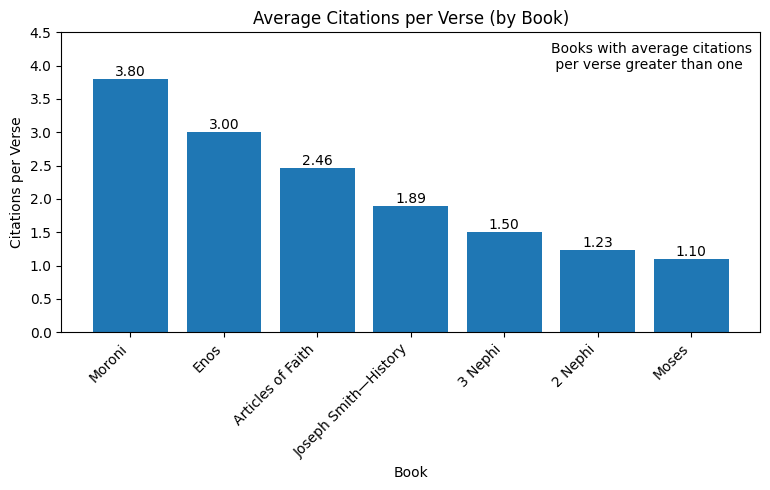

In [4]:
# 2. Bar chart with the 5 books with the most citations (by proportion) 

# Prepare the data
df_2 = {}
cite_dict = df.groupby('Book')['Citations'].sum().to_dict()
count_dict = counts_df.groupby(by='Book')['Verse_Count'].sum().to_dict()
for key in cite_dict:
    df_2[key] = round(cite_dict[key] / count_dict[key], 2)
df_2 = pd.DataFrame(list(df_2.items()), columns=['Book', 'Average'])
df_2 = df_2.sort_values(by='Average', ascending=False).head(7)  # Books with average citations per verse greater than one
df_2.reset_index(drop = True, inplace = True)

# Make the plot
plt.figure(figsize=(8,5))
plt.bar(df_2["Book"], df_2["Average"], color = 'b')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 4.5)
plt.xlabel("Book")
plt.ylabel("Citations per Verse")
plt.title("Average Citations per Verse (by Book)")
plt.text(4.5, 3.95, "Books with average citations \n per verse greater than one", ha = 'left', fontsize = 10) 
for bar in plt.bar(df_2["Book"], df_2["Average"]):
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        height,                   
        f"{height:.2f}",        
        ha='center', va='bottom'     
    )
plt.tight_layout()
plt.show()